In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('sample_data/new_data4.csv')

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) 
for col in string_columns: 
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [53]:
rows_to_drop = df[df['price_usd']<12000].index
df.drop(rows_to_drop, inplace=True)

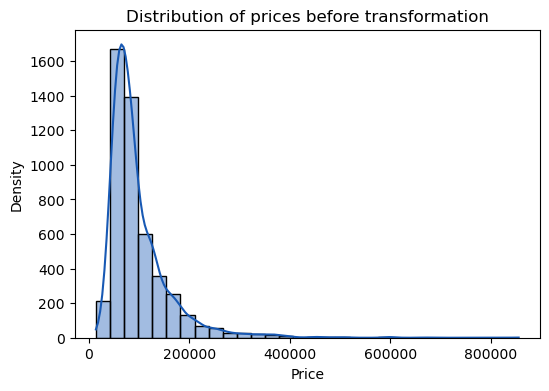

In [29]:

plt.figure(figsize=(6, 4))


sns.histplot(df['ценна_доллар'], bins=30, color='#1859b4', alpha=0.4, kde=True)


plt.ylabel('Density')
plt.xlabel('Price')
plt.title('Distribution of prices before transformation')
plt.savefig('figs/price_before_trans.png', dpi=300)


plt.show()

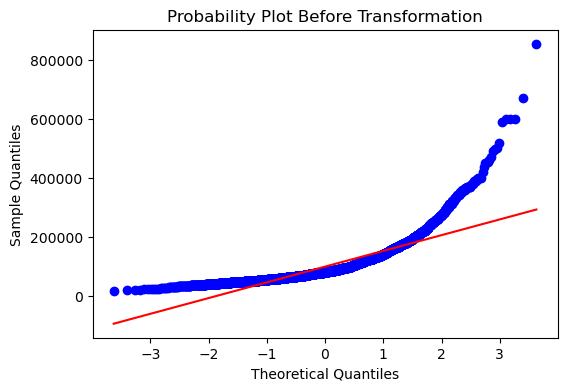

In [55]:
import scipy.stats as stats
data = df['price_usd']
plt.figure(figsize=(6, 4))
stats.probplot(data, dist="norm", plot=plt)


plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Probability Plot Before Transformation')
plt.savefig('figs/price_before_trans_prob.png', dpi=300, bbox_inches='tight')
plt.show()

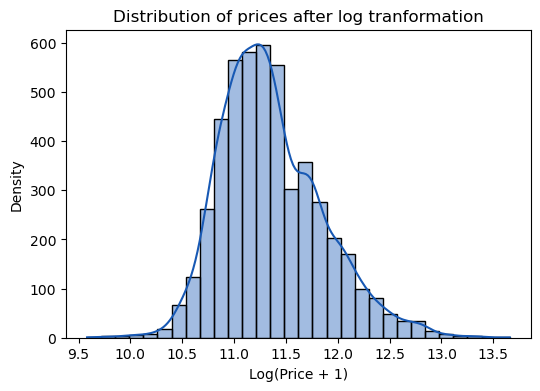

In [27]:
log_price = np.log1p(df['ценна_доллар'])

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=30, color='#1859b4', alpha=0.4, kde=True)
plt.ylabel('Density')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')
plt.savefig('figs/price_after_trans.png', dpi=300)
plt.show()


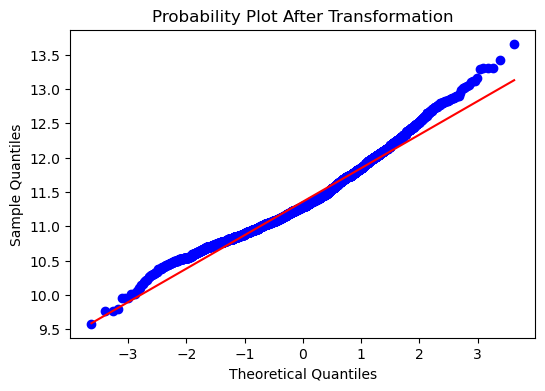

In [34]:
data_lg = np.log1p(df['ценна_доллар'])
plt.figure(figsize=(6, 4))
stats.probplot(data_lg, dist="norm", plot=plt)


plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Probability Plot After Transformation')
plt.savefig('figs/price_after_trans_prob.png', dpi=300)
plt.show()

In [35]:
df.columns

Index(['тип_предложения', 'комнаты', 'адрес', 'серия', 'площадь', 'отопление',
       'состояние', 'возможность_рассрочки', 'возможность_ипотеки',
       'возможность_обмена', 'интернет', 'газ', 'балкон', 'мебель', 'пол',
       'высота_потолков', 'телефон', 'санузел', 'входная_дверь', 'парковка',
       'ценна_доллар', 'lat', 'lon', 'город', 'номер_этажа', 'общий_этаж',
       'домофон', 'видеонаблюдение', 'охрана', 'решетки_на_окнах',
       'кодовый_замок', 'сигнализация', 'видеодомофон', 'консьерж',
       'договор_купли-продажи', 'договор_дарения', 'технический_паспорт',
       'акт_ввода_в_эксплуатацию', 'красная_книга', 'зеленая_книга',
       'материал', 'год'],
      dtype='object')

In [44]:
new_column_names = {
    'тип_предложения': 'offer_type',
    'комнаты': 'rooms',
    'адрес': 'address',
    'серия': 'series',
    'площадь': 'area',
    'отопление': 'heating',
    'состояние': 'condition',
    'возможность_рассрочки': 'installment_available',
    'возможность_ипотеки': 'mortgage_available',
    'возможность_обмена': 'exchange_available',
    'интернет': 'internet',
    'газ': 'gas',
    'балкон': 'balcony',
    'мебель': 'furniture',
    'пол': 'floor',
    'высота_потолков': 'ceiling_height',
    'телефон': 'telephone',
    'санузел': 'bathroom',
    'входная_дверь': 'entrance_door',
    'парковка': 'parking',
    'ценна_доллар': 'price_usd',
    'lat': 'latitude',
    'lon': 'longitude',
    'город': 'city',
    'номер_этажа': 'floor_number',
    'общий_этаж': 'total_floors',
    'домофон': 'intercom',
    'видеонаблюдение': 'cctv',
    'охрана': 'security',
    'решетки_на_окнах': 'window_grilles',
    'кодовый_замок': 'code_lock',
    'сигнализация': 'alarm_system',
    'видеодомофон': 'video_intercom',
    'консьерж': 'concierge',
    'договор_купли-продажи': 'purchase_agreement',
    'договор_дарения': 'gift_deed',
    'технический_паспорт': 'technical_passport',
    'акт_ввода_в_эксплуатацию': 'commissioning_act',
    'красная_книга': 'red_book',
    'зеленая_книга': 'green_book',
    'материал': 'material',
    'год': 'year'
}

df.rename(columns=new_column_names, inplace=True)

In [48]:
new_column_names = {
    'Тип предложения': 'offer_type',
    'Комнаты': 'rooms',
    'Адрес': 'address',
    'Серия': 'series',
    'Площадь': 'area',
    'Отопление': 'heating',
    'Состояние': 'condition',
    'Возможность рассрочки': 'installment_available',
    'Возможность ипотеки': 'mortgage_available',
    'Возможность обмена': 'exchange_available',
    'Интернет': 'internet',
    'Газ': 'gas',
    'Балкон': 'balcony',
    'Мебель': 'furniture',
    'Пол': 'floor',
    'Высота потолков': 'ceiling_height',
    'Телефон': 'telephone',
    'Санузел': 'bathroom',
    'Входная дверь': 'entrance_door',
    'Парковка': 'parking',
    'Ценна доллар': 'price_usd',
    'Lat': 'latitude',
    'Lon': 'longitude',
    'Город': 'city',
    'Номер этажа': 'floor_number',
    'Общий этаж': 'total_floors',
    'Домофон': 'intercom',
    'Видеонаблюдение': 'cctv',
    'Охрана': 'security',
    'Решетки на окнах': 'window_grilles',
    'Кодовый замок': 'code_lock',
    'Сигнализация': 'alarm_system',
    'Видеодомофон': 'video_intercom',
    'Консьерж': 'concierge',
    'Договор купли-продажи': 'purchase_agreement',
    'Договор дарения': 'gift_deed',
    'Технический паспорт': 'technical_passport',
    'Акт ввода в эксплуатацию': 'commissioning_act',
    'Красная книга': 'red_book',
    'зеленая книга': 'green_book',
    'Материал': 'material',
    'Год': 'year'
}

df.rename(columns=new_column_names, inplace=True)

In [49]:
df.head().T

,0,1,2,3,4
offer_type,собственник,собственник,собственник,собственник,собственник
rooms,1,3,2,1,3
address,"Бишкек, Магистраль, Куттубаева/Южная Магистраль","Бишкек, Ак Кеме","Бишкек, Ак Эмир рынок, Московская/Шопокова, 38","Бишкек, Ак-Орго ж/м, Ахунбаева/Ашар","Бишкек, КГУСТА, Малдыбаева 30Б/Ахунбаева"
series,элитка,элитка,элитка,элитка,индивид. планировка
area,40.0,110.9,78.93,39.0,68.0
heating,1.0,1.0,1.0,1.0,1.0
condition,евроремонт,евроремонт,под самоотделку (псо),под самоотделку (псо),хорошее
installment_available,NaN,NaN,0.0,1.0,NaN
mortgage_available,NaN,1.0,0.0,NaN,NaN
exchange_available,обмен не предлагать,рассмотрю варианты,NaN,NaN,NaN


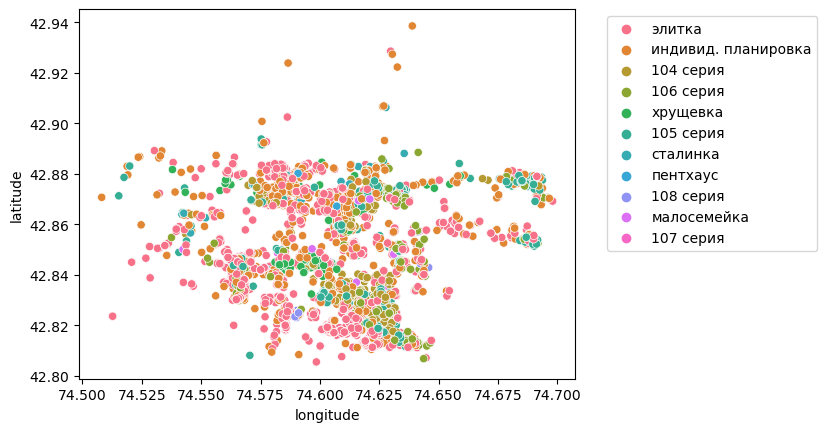

In [52]:
sns.scatterplot(x="longitude", y="latitude", data=df, hue="series")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('figs/series_lon_lat.png', dpi=300, bbox_inches='tight')
plt.show()

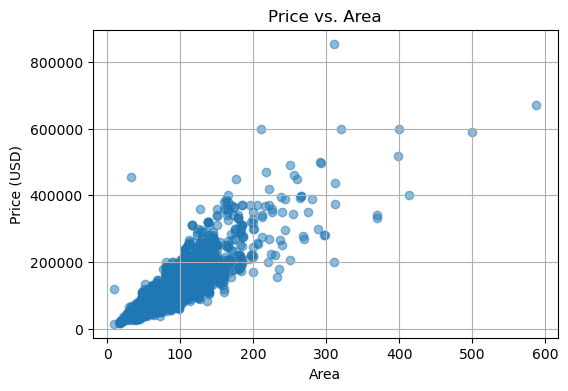

In [57]:
plt.figure(figsize=(6, 4))
plt.scatter(df['area'], df['price_usd'], alpha=0.5)
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.savefig('figs/dependency_price_area.png', dpi=300, bbox_inches='tight')
plt.show()

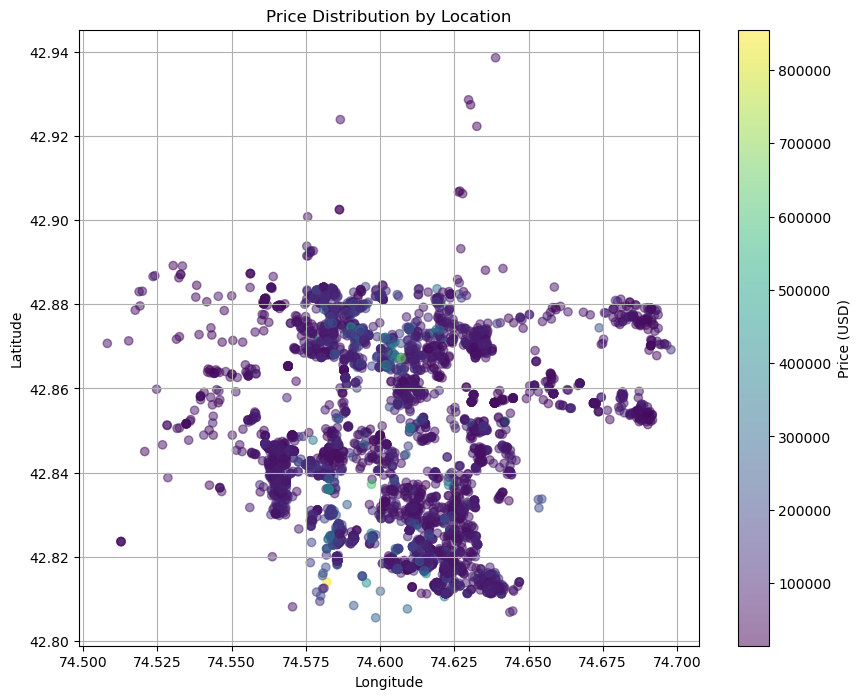

In [61]:
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price_usd'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price (USD)')
plt.title('Price Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('figs/dependency_price_loaction.png', dpi=300, bbox_inches='tight')
plt.show()

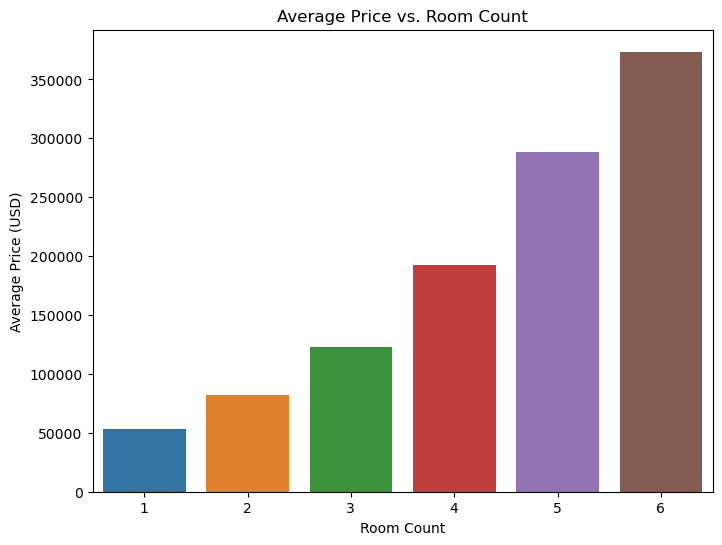

In [67]:
avg_price_per_room = df.groupby('rooms')['price_usd'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='rooms', y='price_usd', data=avg_price_per_room)
plt.title('Average Price vs. Room Count')
plt.xlabel('Room Count')
plt.ylabel('Average Price (USD)')
plt.savefig('figs/dependency_price_room.png', dpi=300, bbox_inches='tight')
plt.show()

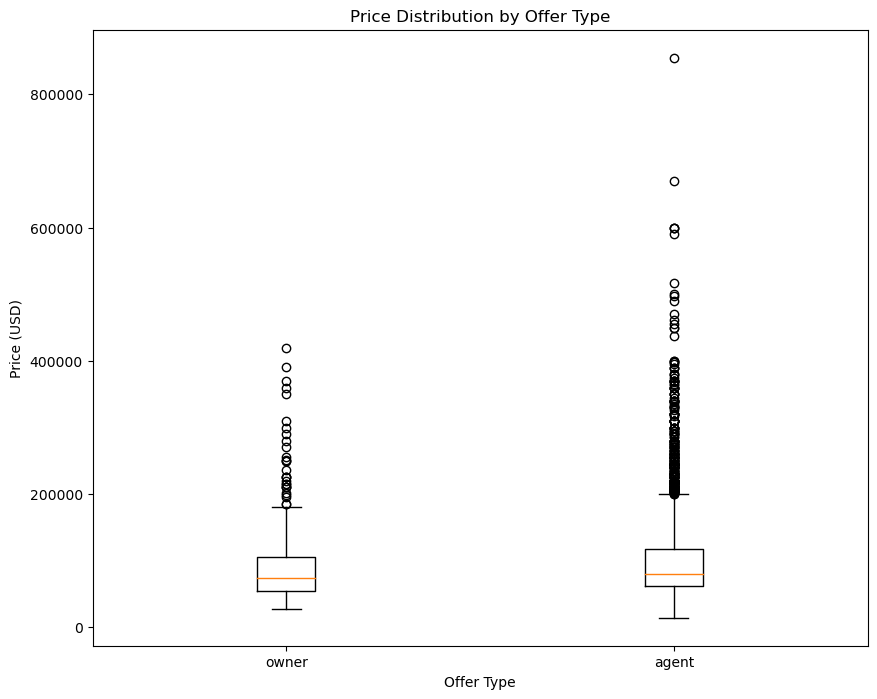

In [73]:


translated_labels = {'агент': 'agent', 'собственник': 'owner'}

median_prices = df.groupby('offer_type')['price_usd'].median().sort_values()

plt.figure(figsize=(10, 8))
plt.boxplot([df[df['offer_type'] == offer]['price_usd'] for offer in median_prices.index], labels=[translated_labels.get(offer, offer) for offer in median_prices.index])
plt.title('Price Distribution by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Price (USD)')
plt.savefig('figs/dependency_price_offertype.png', dpi=300, bbox_inches='tight')
plt.show()


In [74]:
df.head().T

,0,1,2,3,4
offer_type,собственник,собственник,собственник,собственник,собственник
rooms,1,3,2,1,3
address,"Бишкек, Магистраль, Куттубаева/Южная Магистраль","Бишкек, Ак Кеме","Бишкек, Ак Эмир рынок, Московская/Шопокова, 38","Бишкек, Ак-Орго ж/м, Ахунбаева/Ашар","Бишкек, КГУСТА, Малдыбаева 30Б/Ахунбаева"
series,элитка,элитка,элитка,элитка,индивид. планировка
area,40.0,110.9,78.93,39.0,68.0
heating,1.0,1.0,1.0,1.0,1.0
condition,евроремонт,евроремонт,под самоотделку (псо),под самоотделку (псо),хорошее
installment_available,NaN,NaN,0.0,1.0,NaN
mortgage_available,NaN,1.0,0.0,NaN,NaN
exchange_available,обмен не предлагать,рассмотрю варианты,NaN,NaN,NaN


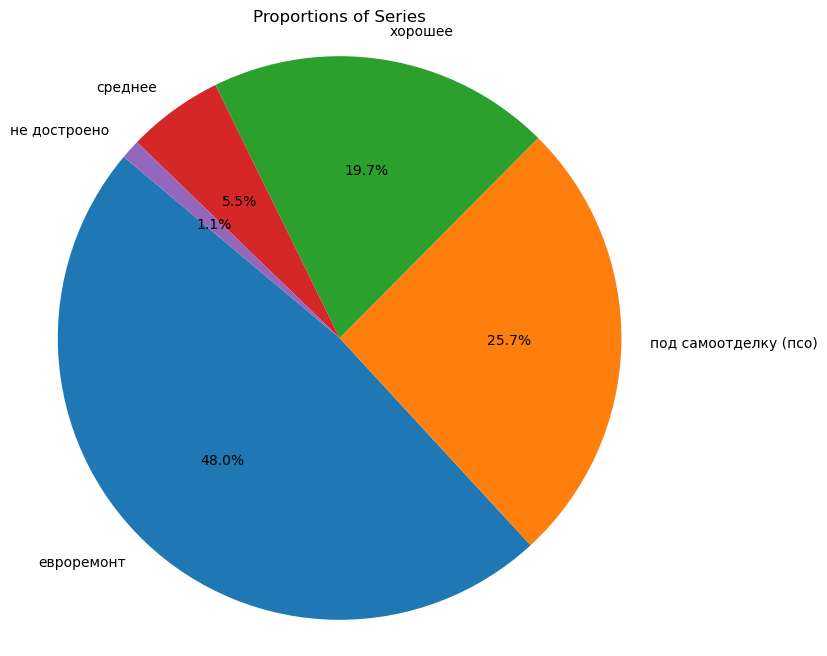

In [78]:


series_counts = df['condition'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 8))
plt.pie(series_counts, labels=series_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Condition')
plt.axis('equal') 
plt.show()


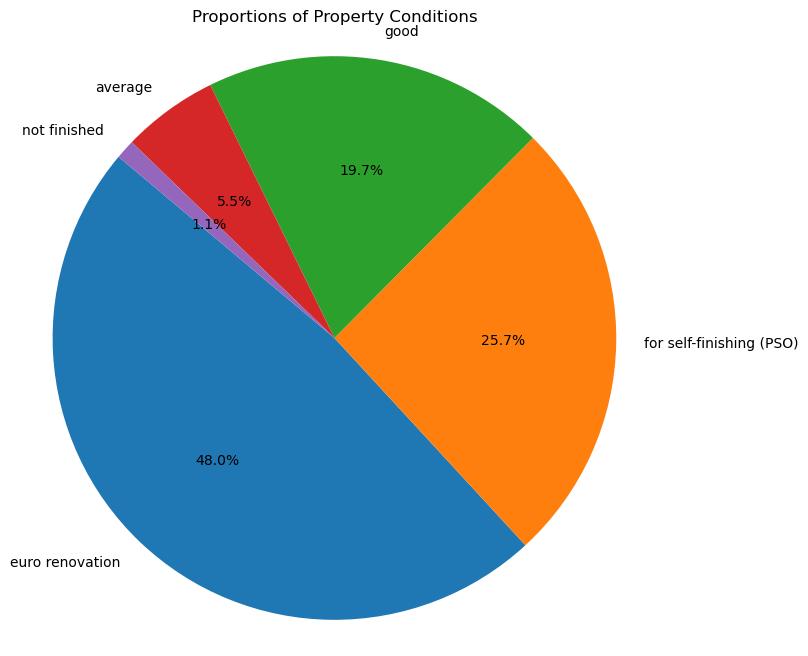

In [91]:
translation_map = {
    'евроремонт': 'euro renovation',
    'под самоотделку (псо)': 'for self-finishing (PSO)',
    'хорошее': 'good',
    'среднее': 'average',
    'не достроено': 'not finished'
}


df['condition_translated'] = df['condition'].map(translation_map)


condition_counts = df['condition_translated'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Property Conditions')
plt.axis('equal')  
plt.savefig('figs/contion.png', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
df['exchange_available'].value_counts()

exchange_available
обмен не предлагать      479
рассмотрю варианты        81
с доплатой покупателя     23
обмен на авто             10
с доплатой продавца        1
ключ на ключ               1
Name: count, dtype: int64

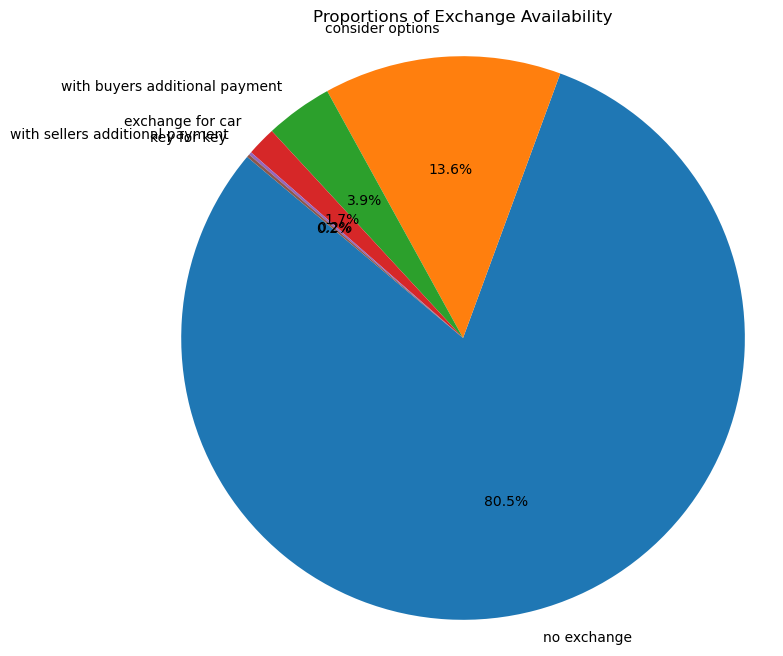

In [94]:

exchange_translation_map = {
    'обмен не предлагать': 'no exchange',
    'рассмотрю варианты': 'consider options',
    'с доплатой покупателя': 'with buyers additional payment',
    'обмен на авто': 'exchange for car',
    'с доплатой продавца': 'with sellers additional payment',
    'ключ на ключ': 'key for key'
}


df['exchange_available_translated'] = df['exchange_available'].map(exchange_translation_map)


exchange_counts = df['exchange_available_translated'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(exchange_counts, labels=exchange_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Exchange Availability')
plt.axis('equal') 
plt.show()


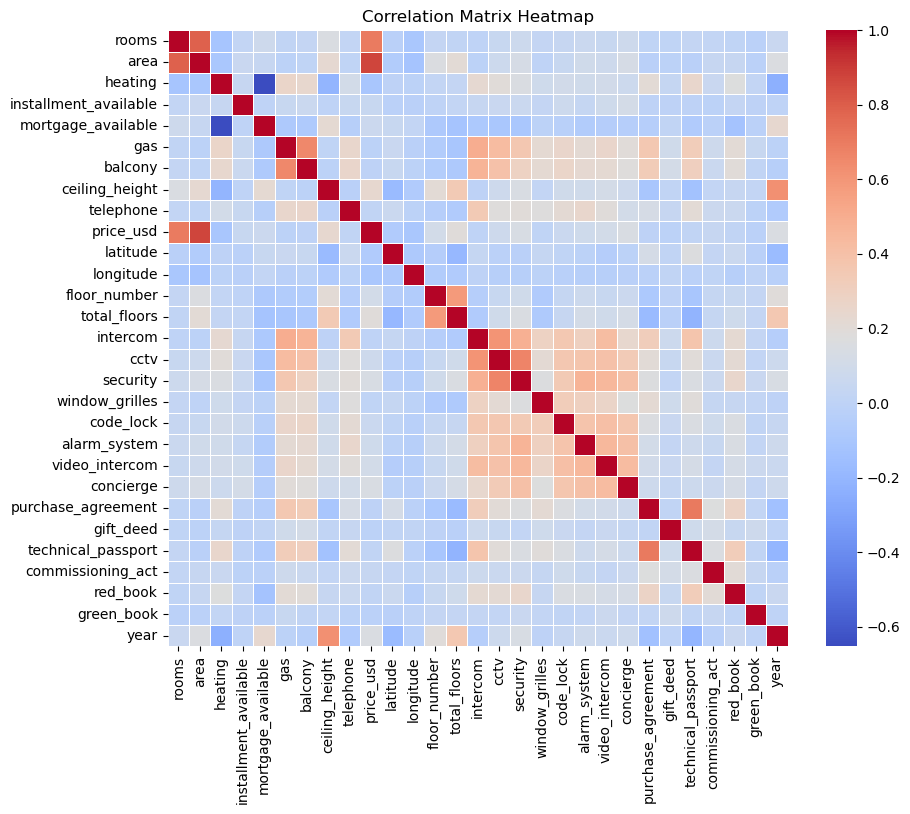

In [98]:

numeric_columns = df.select_dtypes(include=['number'])

numeric_columns_filled = numeric_columns.fillna(0)

correlation_matrix = numeric_columns_filled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('figs/cormatheatmap.png', dpi=300, bbox_inches='tight')
plt.show()
